# Тренировочный тест: Критерии Стьюдента

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn import cross_validation, linear_model, metrics, ensemble
%pylab inline

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [70]:
mu = 9.5
sigma = 0.4
n = 160
mean = 9.57

In [71]:
Z = (mean-mu)/(sigma/np.sqrt(n))

In [72]:
Z

2.2135943621178749

In [73]:
# уровень значимости
2*(1-stats.norm.cdf(abs(Z)))

0.026856695507523787

Имеются данные о стоимости и размерах 53940 бриллиантов:

diamonds.txt
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [74]:
data = pd.read_csv('diamonds.txt', sep = '\t', header = 0)

In [75]:
data.head(3)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31


In [76]:
X = data[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = data.price

In [77]:
train_x, test_x, train_y, test_y = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [80]:
# Линейная Регрессия
linear_regressor = linear_model.LinearRegression() #создание модели 
linear_regressor.fit(train_x, train_y) #обучение
linear_predictions = linear_regressor.predict(test_x) #применение обученой модели к тестовой выборке

# В качестве Метрики используем Среднее абсолютное отклоненеие прогноза от факта (mean_absolute_error)
metrics.mean_absolute_error(test_y, linear_predictions)

890.37640042856037

In [83]:
# Случайный регерссионный лес
RF = ensemble.RandomForestRegressor(random_state = 1) #создание модели 
RF.fit(train_x, train_y) #обучение
RF_predictions = RF.predict(test_x) #применение обученой модели к тестовой выборке

# В качестве Метрики используем Среднее абсолютное отклоненеие прогноза от факта (mean_absolute_error)
metrics.mean_absolute_error(test_y, RF_predictions)

803.91719195503947

Проверка нулевой гипотезы об одинаковом среднем качестве предсказаний

In [84]:
X1 = linear_predictions
X2 = RF_predictions

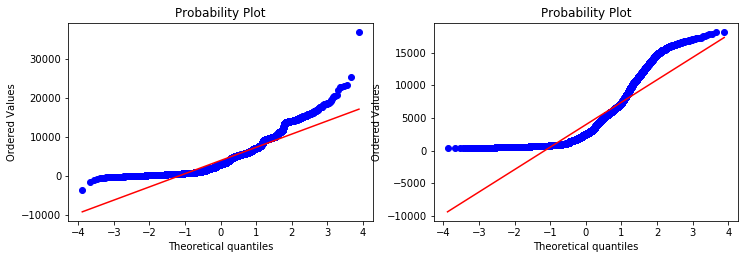

In [97]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(X1, dist="norm", plot=pylab) # Q-Q график для X1
pylab.subplot(2,2,2)
stats.probplot(X2, dist="norm", plot=pylab) # Q-Q график для X2
pylab.show()

In [96]:
# двухвыборочный критерий Стюдента для зависимых выборок
stats.ttest_rel(X1, X2)

Ttest_relResult(statistic=-3.722951348317511, pvalue=0.00019770884228417646)

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница?

In [100]:
from statsmodels.stats.weightstats import *

In [107]:
# t интервал для разности
print "95%% confidence interval: [%f, %f]" % DescrStatsW(X2 - X1).tconfint_mean()

95% confidence interval: [13.959597, 45.004056]
